In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Read the CSV file
df = pd.read_csv("resources/pollution_dataset.csv")

# Review the DataFrame
df.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor


In [3]:
num_entries = len(df)
print(f"Number of entries: {num_entries}")

Number of entries: 5000


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


## Find and remove outliers

In [16]:
# Split our preprocessed data into our features and target arrays
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

In [19]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
y_categorical = to_categorical(y_encoded)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=42)


In [23]:
scaler = StandardScaler()

In [24]:
X_scaler = scaler.fit(X_train)

In [25]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers

In [44]:
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Use Input layer
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3281 - loss: 2.1559 - val_accuracy: 0.3933 - val_loss: 1.8443
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3847 - loss: 1.7964 - val_accuracy: 0.3907 - val_loss: 1.6799
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3889 - loss: 1.6600 - val_accuracy: 0.3960 - val_loss: 1.5628
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3771 - loss: 1.5521 - val_accuracy: 0.3960 - val_loss: 1.4810
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4034 - loss: 1.4740 - val_accuracy: 0.3960 - val_loss: 1.4236
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3983 - loss: 1.4245 - val_accuracy: 0.3960 - val_loss: 1.3839
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3890 - loss: 1.3844 - val_accuracy: 0.3960 - val_loss: 1.3554
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3942 - loss: 1.3653 - val_accuracy: 0.3960 - val_loss:

In [47]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.3944 - loss: 1.2811
Loss: 1.2810722589492798, Accuracy: 0.3944000005722046


In [30]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5392 - loss: 1.0638 - val_accuracy: 0.3227 - val_loss: 1.4686
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5575 - loss: 1.0430 - val_accuracy: 0.2933 - val_loss: 1.4759
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5568 - loss: 1.0504 - val_accuracy: 0.3173 - val_loss: 1.4732
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5514 - loss: 1.0349 - val_accuracy: 0.3013 - val_loss: 1.4716
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5530 - loss: 1.0360 - val_accuracy: 0.3147 - val_loss: 1.4825
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5695 - loss: 1.0317 - val_accuracy: 0.3067 - val_loss: 1.4932
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5484 - loss: 1.0424 - val_accuracy: 0.3347 - val_loss: 1.5081
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5525 - loss: 1.0282 - val_accuracy: 0.2947 - val_loss:

In [31]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

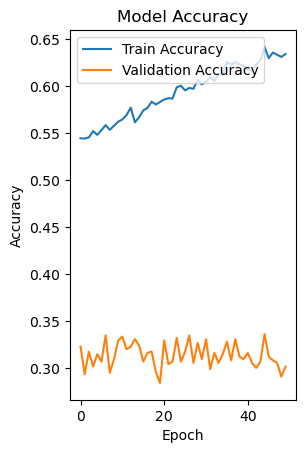

In [32]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

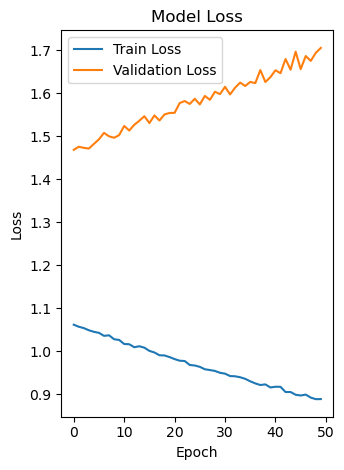

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Training and Validation Accuracy:

If both training and validation accuracy are low, your model may be underfitting.
If training accuracy is high but validation accuracy is low, your model is likely overfitting.
If both accuracies are improving and converge, your model is likely performing well.
Training and Validation Loss:

If training loss decreases while validation loss increases, this indicates overfitting.
If both losses decrease, your model is learning well.
If both losses are high, your model may not be learning effectively.
Next Steps Based on Observations:
If Overfitting: Consider using dropout layers, regularization, or reducing model complexity.
If Underfitting: Increase model complexity by adding more layers or neurons.
If Both Losses Are High: Investigate data quality, feature scaling, or try a different model architecture.

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6554 - loss: 0.8535 - val_accuracy: 0.3200 - val_loss: 1.6915
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6495 - loss: 0.8591 - val_accuracy: 0.3227 - val_loss: 1.6875
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6510 - loss: 0.8771 - val_accuracy: 0.3200 - val_loss: 1.6990
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6472 - loss: 0.8591 - val_accuracy: 0.3027 - val_loss: 1.7218
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6571 - loss: 0.8617 - val_accuracy: 0.3160 - val_loss: 1.7320
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6484 - loss: 0.8445 - val_accuracy: 0.3093 - val_loss: 1.7089
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6408 - loss: 0.8774 - val_accuracy: 0.3053 - val_loss: 1.7319


In [35]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.3304 - loss: 1.6974
Loss: 1.6974488496780396, Accuracy: 0.3303999900817871


In [ ]:
# Create a dictionary to hold outliers
outliers_dict = {}

In [ ]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    outliers_dict = {}
    for column in data.columns:
        if column != 'air_quality_encoded':  # Exclude the target variable
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            outliers_dict[column] = outliers
    return outliers_dict

In [ ]:
# Detect outliers in the DataFrame
outliers_dict = detect_outliers_iqr(df)

In [ ]:
# Print outliers for each column (excluding air_quality_encoded)
for column, outliers in outliers_dict.items():
    print(f"Outliers in column '{column}':")
    print(outliers)
    print("\n")

In [ ]:
outliers_dict[column] = outliers

In [ ]:
# Define a function to remove outliers using the IQR method

def remove_outliers_iqr(data):
    for column in data.columns:
        if column != 'air_quality_encoded':  # Exclude the target variable
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Remove outliers
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [ ]:
# Confirm outliers were removed
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")

In [ ]:
cleaned_df = remove_outliers_iqr(df)

In [ ]:
X = df.drop('Air Quality', axis=1)  # Features
y = df['Air Quality']  # Target

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for the test data

In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train_resampled)  # Use y_train_resampled here

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
# Print the classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Model 2: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train_resampled)  # Use y_train_resampled her)

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

In [ ]:
# K-means Clustering
# Choose the number of clusters (k)
k = 4  # You can adjust this based on your specific use case

In [ ]:
# Initialize and fit the K-means model
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X_train_scaled)

In [ ]:
# Predict cluster labels for the training data
clusters = kmeans_model.predict(X_train_scaled)

In [ ]:
X_train_with_clusters = np.hstack((X_train_scaled, clusters.reshape(-1, 1)))

In [ ]:
# Print cluster centers
print("Cluster Centers:")
print(kmeans_model.cluster_centers_)

In [ ]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [ ]:
# Plot cluster centers
centers = pca.transform(kmeans_model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()
plt.grid()
plt.show()

## Check feature importance

In [48]:
importances = model.feature_importances_

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

In [ ]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()